## TURMA: FIAP-8IA 
### Alunos
* ALEX DIAS DE ARAUJO - RM 334983
* ANDRE LUIZ SILVA RODRIGUES - RM 334911
* JOSÉ ANTONIO WESLEY CRUZ - RM 334341
* PAULO ARAUJO BARBOSA - RM 335284

## 1) Leia o arquivo lemonades.csv usando pandas

In [1]:
#Resposta 1

import pandas as pd # para leitura de base de dados e manipulação de data frame
import numpy as np # para álgebra linear
import altair as alt # para plotar gráficos
import sys
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import altair as alt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pdb
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('Lemonades.csv', sep = ';')
data.columns = data.columns.str.upper() #change into upper case

data['LOCATION'] = data['LOCATION'].apply(lambda x: x.upper()) # Passando os dados da coluna LOCATION para letra maiscula

print('\033[1;31m Vamos entender nossos dados \033[0;0m','\n', data.dtypes, '\n')
data

 Vamos entender nossos dados  
 DATE            object
LOCATION        object
LEMON            int64
ORANGE           int64
TEMPERATURE      int64
LEAFLETS       float64
PRICE          float64
dtype: object 



,DATE,LOCATION,LEMON,ORANGE,TEMPERATURE,LEAFLETS,PRICE
0,07/01/2016,PARK,97,67,70,90.0,0.25
1,07/02/2016,PARK,98,67,72,90.0,0.25
2,07/03/2016,PARK,110,77,71,104.0,0.25
3,07/04/2016,BEACH,134,99,76,98.0,0.25
4,07/05/2016,BEACH,159,118,78,135.0,0.25
5,07/06/2016,BEACH,103,69,82,90.0,0.25
6,07/06/2016,BEACH,103,69,82,90.0,0.25
7,07/07/2016,BEACH,143,101,81,135.0,0.25
8,NaN,BEACH,123,86,82,113.0,0.25
9,07/09/2016,BEACH,134,95,80,126.0,0.25


## 2) Retorne as informações sobre as colunas e as principais estatísticas sobre o dataset.

In [2]:
#Resposta 2

data.describe()

,LEMON,ORANGE,TEMPERATURE,LEAFLETS,PRICE
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354688
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


## 3) Realize a limpeza do dataset:

#### a. verifique se existe valores nulos

In [3]:
#Resposta 3a)

print('\033[1;31m Valores Faltantes antes do tratamento dos dados: \033[0;0m', '\n',data.isna().sum(), '\n')

 Valores Faltantes antes do tratamento dos dados:  
 DATE           1
LOCATION       0
LEMON          0
ORANGE         0
TEMPERATURE    0
LEAFLETS       1
PRICE          0
dtype: int64 



#### b. verifique e remova, se existir, linhas duplicadas

In [4]:
#Resposta 3b)

print('\033[1;31m Valores Duplicados antes do tratamento dos dados:', '\n \033[0;0m', data[data.duplicated()], '\n')
data = data.drop_duplicates()
# data = data.drop_duplicates().reset_index()
print('\033[1;31m Valores Duplicados depois do tratamento dos dados:', '\n \033[0;0m', data[data.duplicated()], '\n')

 Valores Duplicados antes do tratamento dos dados: 
           DATE LOCATION  LEMON  ORANGE  TEMPERATURE  LEAFLETS  PRICE
6  07/06/2016    BEACH    103      69           82      90.0   0.25 

 Valores Duplicados depois do tratamento dos dados: 
  Empty DataFrame
Columns: [DATE, LOCATION, LEMON, ORANGE, TEMPERATURE, LEAFLETS, PRICE]
Index: [] 



#### c. trate os elementos faltantes (interpolação (data) e media)

In [5]:
#Resposta 3c)

# Complete the call to convert the DATE column from string to datetime:
data['DATE'] =  pd.to_datetime(data['DATE'],format = '%m/%d/%Y')
print('\033[1;31m Confirmar que a coluna de data está no formato correto,\
 após conversão de string para datetime: \033[0;0m', '\n', data['DATE'].dtypes,'\n')

# Converting datatime to float, interpolate it and then convert it back to datetime:
u = data['DATE'].astype('i8').astype('f8') # 64-bit signed integer and 64-bit floating-point number, respectively.
u[data['DATE'].isnull()] = np.nan
data['DATE'] = pd.to_datetime(u.interpolate())

#Fill missed numerical data with mean:
data.update(data['LEAFLETS'].fillna((np.around(np.mean(data['LEAFLETS']),0))))

#Reset Index
data = data.reset_index()

print('\033[1;31m Valores Faltantes depois de tratar os dados: \033[0;0m', '\n',data.isna().sum(), '\n')
data

 Confirmar que a coluna de data está no formato correto, após conversão de string para datetime:  
 datetime64[ns] 

 Valores Faltantes depois de tratar os dados:  
 index          0
DATE           0
LOCATION       0
LEMON          0
ORANGE         0
TEMPERATURE    0
LEAFLETS       0
PRICE          0
dtype: int64 



,index,DATE,LOCATION,LEMON,ORANGE,TEMPERATURE,LEAFLETS,PRICE
0,0,2016-07-01,PARK,97,67,70,90.0,0.25
1,1,2016-07-02,PARK,98,67,72,90.0,0.25
2,2,2016-07-03,PARK,110,77,71,104.0,0.25
3,3,2016-07-04,BEACH,134,99,76,98.0,0.25
4,4,2016-07-05,BEACH,159,118,78,135.0,0.25
5,5,2016-07-06,BEACH,103,69,82,90.0,0.25
6,7,2016-07-07,BEACH,143,101,81,135.0,0.25
7,8,2016-07-08,BEACH,123,86,82,113.0,0.25
8,9,2016-07-09,BEACH,134,95,80,126.0,0.25
9,10,2016-07-10,BEACH,140,98,82,131.0,0.25


## 4) Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja

In [6]:
#Resposta 4

data.insert(len(data.columns)-1,'SALES', (data['LEMON'] + data['ORANGE']))
data.head()

,index,DATE,LOCATION,LEMON,ORANGE,TEMPERATURE,LEAFLETS,SALES,PRICE
0,0,2016-07-01,PARK,97,67,70,90.0,164,0.25
1,1,2016-07-02,PARK,98,67,72,90.0,165,0.25
2,2,2016-07-03,PARK,110,77,71,104.0,187,0.25
3,3,2016-07-04,BEACH,134,99,76,98.0,233,0.25
4,4,2016-07-05,BEACH,159,118,78,135.0,277,0.25


## 5) Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço)

In [7]:
#Resposta 5

data.insert(len(data.columns),'REVENUE', data['PRICE'] * data['SALES'])
data.head()

,index,DATE,LOCATION,LEMON,ORANGE,TEMPERATURE,LEAFLETS,SALES,PRICE,REVENUE
0,0,2016-07-01,PARK,97,67,70,90.0,164,0.25,41.00
1,1,2016-07-02,PARK,98,67,72,90.0,165,0.25,41.25
2,2,2016-07-03,PARK,110,77,71,104.0,187,0.25,46.75
3,3,2016-07-04,BEACH,134,99,76,98.0,233,0.25,58.25
4,4,2016-07-05,BEACH,159,118,78,135.0,277,0.25,69.25


## 6)Escreva uma função que retorne o lucro total

In [8]:
#Resposta 6

# Temos duas altenativas para resolver essa questão

#Alternativa 1:

# Função para calcular o valor total da coluna REVENUE linha a linha
def lucro_total(valor):
    total = 0
    for x in valor:
        total = total + x
    return total
    
print('\033[1;31mLucro total (Alt1):\033[0;0m', lucro_total(valor = data['REVENUE']))

#Alternativa 2:
profit = np.sum(data['REVENUE'])
print('\033[1;31m O lucro total (Alt2):\033[0;0m', profit)

Lucro total (Alt1): 2138.0
 O lucro total (Alt2): 2138.0


## 7) Escreva uma função que receba dois parâmetros, dataset e temp(int). Se temp for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do período observado; se -1, retorna a temperatura mínima.

In [9]:
#Resposta 7

def temperatura(dataset, temp):
    
    d = dataset
    
    try:
        t = int(temp)
    except UnboundLocalError:
        print("Escolha entre '-1', '0' ou '1'")
    
    if t == 1:
        return np.max(d['TEMPERATURE'])
    elif t == 0:
        return np.mean(d['TEMPERATURE'])
    elif t == -1:
        return np.min(d['TEMPERATURE'])
    else:
        print("Escolha entre '-1', '0' ou '1'")
        sys.exit()
    
# temperatura(data, input("Entre com '1' para temperatura máxima, '0' para temperatura média ou '-1' para temperatura mínima:"))
temp_med = temperatura(data, "0")
print('temp_med = {}'.format(temp_med))

temp_max = temperatura(data, "1")
print('temp_max = {}'.format(temp_max))

temp_min = temperatura(data, "-1")
print('temp_min = {}'.format(temp_min))

temp_med = 78.87096774193549
temp_max = 84
temp_min = 70


## 8)Escreva uma função que receba dois parâmetros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach'.

In [10]:
# Resposta 8

def locprice(dataset, loc):
    
    l = loc.upper()
    
    if l == "PARK":
         dataset.loc[dataset['LOCATION']=='PARK',['PRICE']] *= 1.15
        
    elif l == "BEACH":
         dataset.loc[dataset['LOCATION']=='BEACH',['PRICE']] *= 1.10

    else:
        print("Escolha entre 'Park' ou 'Beach'")
        sys.exit()

    return dataset
        
# locprice(data, input("Escolha entre 'Park' ou 'Beach':"))
locprice(data, 'park')
locprice(data, 'Beach')
data

,index,DATE,LOCATION,LEMON,ORANGE,TEMPERATURE,LEAFLETS,SALES,PRICE,REVENUE
0,0,2016-07-01,PARK,97,67,70,90.0,164,0.2875,41.00
1,1,2016-07-02,PARK,98,67,72,90.0,165,0.2875,41.25
2,2,2016-07-03,PARK,110,77,71,104.0,187,0.2875,46.75
3,3,2016-07-04,BEACH,134,99,76,98.0,233,0.2750,58.25
4,4,2016-07-05,BEACH,159,118,78,135.0,277,0.2750,69.25
5,5,2016-07-06,BEACH,103,69,82,90.0,172,0.2750,43.00
6,7,2016-07-07,BEACH,143,101,81,135.0,244,0.2750,61.00
7,8,2016-07-08,BEACH,123,86,82,113.0,209,0.2750,52.25
8,9,2016-07-09,BEACH,134,95,80,126.0,229,0.2750,57.25
9,10,2016-07-10,BEACH,140,98,82,131.0,238,0.2750,59.50


## 9)Escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank (descendente)

In [11]:
# RESPOSTA 9

def ranking(dataset):
    data['RANK'] = data['TEMPERATURE'].rank(ascending=1)
    return data.sort_values('RANK', ascending=False)

ranking(data)

,index,DATE,LOCATION,LEMON,ORANGE,TEMPERATURE,LEAFLETS,SALES,PRICE,REVENUE,RANK
24,25,2016-07-25,PARK,156,113,84,135.0,269,0.5750,134.50,30.5
11,12,2016-07-12,BEACH,130,95,84,99.0,225,0.2750,56.25,30.5
25,26,2016-07-26,PARK,176,129,83,158.0,305,0.4025,106.75,28.5
10,11,2016-07-11,BEACH,162,120,83,135.0,282,0.2750,70.50,28.5
9,10,2016-07-10,BEACH,140,98,82,131.0,238,0.2750,59.50,24.0
23,24,2016-07-24,PARK,121,82,82,117.0,203,0.5750,101.50,24.0
27,28,2016-07-28,PARK,96,63,82,90.0,159,0.4025,55.65,24.0
30,31,2016-07-31,BEACH,76,47,82,68.0,123,0.3850,43.05,24.0
7,8,2016-07-08,BEACH,123,86,82,113.0,209,0.2750,52.25,24.0
5,5,2016-07-06,BEACH,103,69,82,90.0,172,0.2750,43.00,24.0


## 10) Imprima um gráfico de linha que retorne o lucro ao longo do tempo

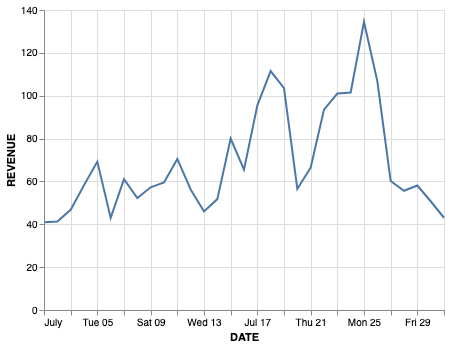

In [12]:
# RESPOSTA 10

alt.Chart(data).mark_line().encode(
    x='DATE',
    y='REVENUE',
)

## 11) Crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados? (Use a correlação de Pearson e explique o significado do valor obtido por ela)

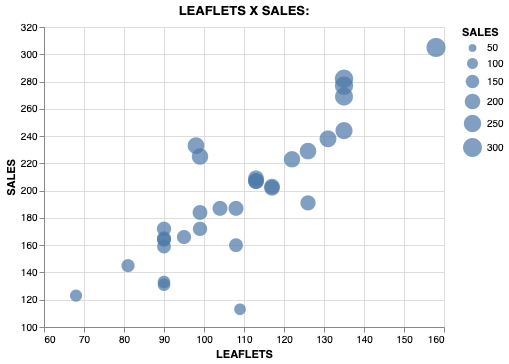

In [13]:
# Resposta 11

alt.Chart(data).mark_circle().encode(
        alt.X('LEAFLETS', scale=alt.Scale(zero=False)),
        alt.Y('SALES', scale=alt.Scale(zero=False, padding=1)),
        size='SALES'
        ).properties(
        title='LEAFLETS X SALES:'
        )

In [14]:
# Resposta 11 (continuação)

lxp = data.iloc[:,[6,7]]
lxp = lxp.corr(method='pearson')
print(lxp, '\n')
print('\033[1;92m Pelo resultado da correlação de Pearson, podemos afirmar que há uma forte \
correlação entre as variáveis "LEAFLETS" e "SALES", pois seu valor %.2f está entre +0.75 e +1. \033[0;92m' % (lxp.iloc[0,1]), '\n',)


          LEAFLETS     SALES
LEAFLETS  1.000000  0.843905
SALES     0.843905  1.000000 

 Pelo resultado da correlação de Pearson, podemos afirmar que há uma forte correlação entre as variáveis "LEAFLETS" e "SALES", pois seu valor 0.84 está entre +0.75 e +1.  



## 12) Crie um histograma com 10 bins que mostre o lucro (revenue).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b837390>]],
      dtype=object)

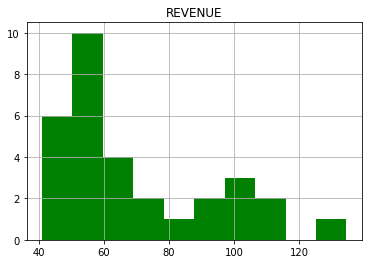

In [15]:
# Resposta 12

data.hist(['REVENUE'], bins=10, color='g', alpha=1)

## 13) Crie um gráfico de linha que mostre o lucro (Revenue) por tipo de fruta ao longo do tempo.

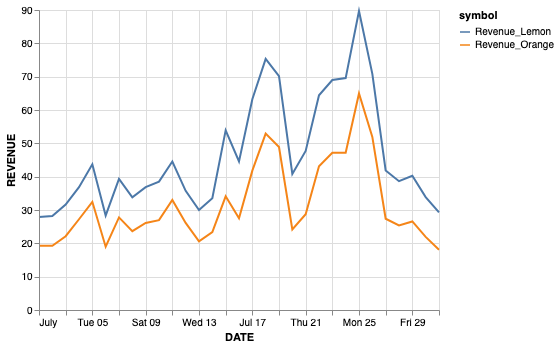

In [16]:
# Resposta 13

df = data.loc[:,['DATE','LEMON','ORANGE','PRICE','REVENUE']]
df.insert(len(df.columns),'Revenue_Lemon', df['LEMON'] * df['PRICE'])
df.insert(len(df.columns),'Revenue_Orange', df['ORANGE'] * df['PRICE'])


# plt.plot(df['DATE'], df['Revenue_Lemon'], label='Lemons')
# plt.plot(df['DATE'], df['Revenue_Orange'], label='Oranges')


# plt.xlabel('Tempo')
# plt.ylabel('Revenue')
# plt.title("Revenue por tipo de fruta ao longo do tempo")

# plt.legend()
# plt.show()

df1 = df.loc[:,['Revenue_Lemon', 'Revenue_Orange', 'DATE']]
df1

df2 = df1.melt('DATE').reset_index()
df2 = df2.rename(columns={'value':'REVENUE', 'variable':'symbol' })
alt.Chart(df2).mark_line().encode(
    x='DATE',
    y='REVENUE',
    color='symbol'
)


## 14) Ajuste uma Regressão Linear aos dados para predizer vendas usando cada uma das features abaixo:

### a.Temperature

In [17]:
#Resposta 14a

feature_col = ['TEMPERATURE']
meta_col = ['SALES']

X = data[feature_col].values
y = data[meta_col].values
split_test_size = 0.30 # 30% da amostra é para treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)


# Training

print('\033[1;92m TRAINING: \033[0;92m')
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) #training the algorithm
y_pred1 = lr_model.predict(X_train)
print("\033[1;31m Mean squared error from Training Step: \033[0;0m %.2f " % mean_squared_error(y_train, y_pred1), '\n')

# Test

print('\n','\033[1;92m TEST: \033[0;92m')
y_pred2 = lr_model.predict(X_test)
print("\033[1;31m Mean squared error from Test Step: \033[0;0m %.2f " % mean_squared_error(y_test, y_pred2),'\n')

 TRAINING: 
 Mean squared error from Training Step:  1968.77  


  TEST: 
 Mean squared error from Test Step:  1344.65  



### b. Leaflets

In [18]:
#Resposta 14b

feature_col = ['LEAFLETS']
meta_col = ['SALES']

X = data[feature_col].values
y = data[meta_col].values
split_test_size = 0.30 # 30% da amostra é para treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)


# Training

print('\033[1;92m TRAINING: \033[0;92m')
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) #training the algorithm
y_pred3 = lr_model.predict(X_train)
print("\033[1;31m Mean squared error from Training Step: \033[0;0m %.2f " % mean_squared_error(y_train, y_pred3), '\n')

# Test

print('\n','\033[1;92m TEST: \033[0;92m')
y_pred4 = lr_model.predict(X_test)
print("\033[1;31m Mean squared error from Test Step: \033[0;0m %.2f " % mean_squared_error(y_test, y_pred4),'\n')

 TRAINING: 
 Mean squared error from Training Step:  892.08  


  TEST: 
 Mean squared error from Test Step:  137.91  



### c. Price

In [19]:
#Resposta 14c

feature_col = ['PRICE']
meta_col = ['SALES']

X = data[feature_col].values
y = data[meta_col].values
split_test_size = 0.30 # 30% da amostra é para treino


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)


# Training

print('\033[1;92m TRAINING: \033[0;92m')
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) #training the algorithm
y_pred5 = lr_model.predict(X_train)
print("\033[1;31m Mean squared error from Training Step: \033[0;0m %.2f " % mean_squared_error(y_train, y_pred5), '\n')


# Test

print('\n','\033[1;92m TEST: \033[0;92m')
y_pred6 = lr_model.predict(X_test)
print("\033[1;31m Mean squared error from Test Step: \033[0;0m %.2f " % mean_squared_error(y_test, y_pred6),'\n')

 TRAINING: 
 Mean squared error from Training Step:  1962.26  


  TEST: 
 Mean squared error from Test Step:  2522.51  



### d. Retorne um gráfico com a reta ajustada aos dados para cada feature e diga se ela é uma variável boa ou não para predizer vendas.

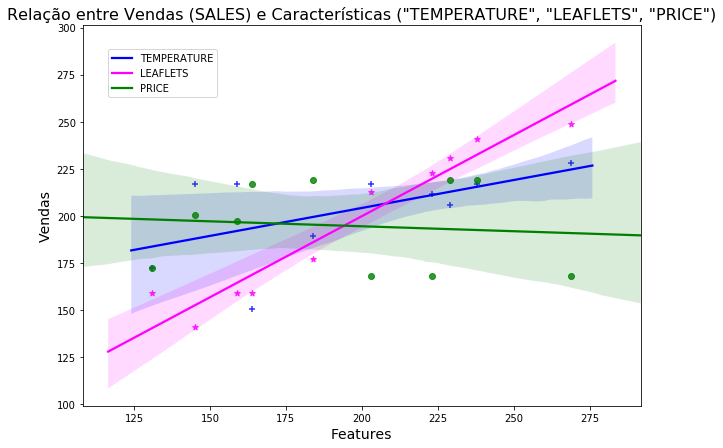


  COMMENTS: 
 TEMPERATURE MSE from Test Step:  1344.65 
 LEAFLETS MSE from Test Step:  137.91 
 PRICE MSE from Test Step:  2522.51 
 Podemos concluir que a única variável boa para predizer vendas é a 'LEAFLETS',dado o seu baixo MSE = 137.9. 


In [20]:
#Resposta 14d

# Regression plot using seaborn.
fig = plt.figure(figsize=(10,7))
sns.regplot(x=y_test,y=y_pred2,color='blue', marker='+')
sns.regplot(x=y_test,y=y_pred4,color='magenta', marker='*')
sns.regplot(x=y_test,y=y_pred6,color='green', marker='o')

# Legend, title and labels.
plt.legend(labels=['TEMPERATURE', 'LEAFLETS', 'PRICE'], bbox_to_anchor=(0.25, 0.95))
plt.title('Relação entre Vendas (SALES) e Características ("TEMPERATURE", "LEAFLETS", "PRICE")', size=16)
plt.xlabel('Features', size=14)
plt.ylabel('Vendas', size=14);
plt.show()

print('\n', '\033[1;96m COMMENTS: \033[1;96m')
print("\033[0;96m TEMPERATURE MSE from Test Step: \033[0;96m %.2f " % mean_squared_error(y_test, y_pred2))
print("\033[0;96m LEAFLETS MSE from Test Step: \033[0;96m %.2f " % mean_squared_error(y_test, y_pred4))
print("\033[0;96m PRICE MSE from Test Step: \033[0;96m %.2f " % mean_squared_error(y_test, y_pred6))

print("\033[1;96m Podemos concluir que a única variável boa para predizer vendas é a 'LEAFLETS',\
dado o seu baixo MSE = %.1f. \033[0;96m" % mean_squared_error(y_test, y_pred4))

## 15) Ajuste uma Regressão Linear aos dados para predizer vendas usando as três features juntas. Comente o resultado obtido.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     46.08
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           1.39e-09
Time:                        20:50:27   Log-Likelihood:                -141.06
No. Observations:                  31   AIC:                             288.1
Df Residuals:                      28   BIC:                             292.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -235.4938     84.814     -2.777      0

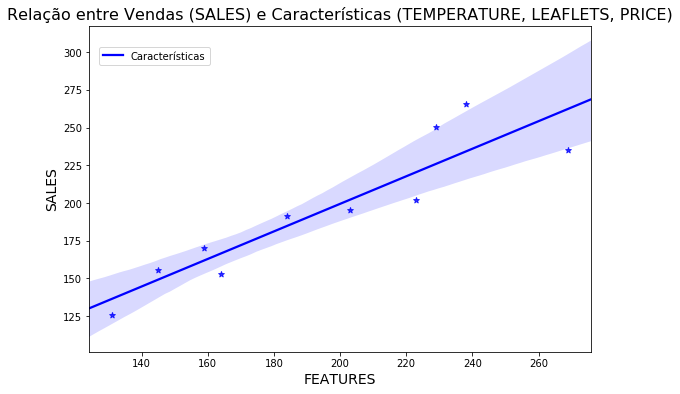


  COMMENTS: 
 Podemos concluir que o uso de todas as características juntas ajudou o modelo a ficar com um MSE menor quando comparado ao obtido com as variáveis 'TEMPERATURE' e 'PRICE' sozinhas. Entretanto, o MSE da característica'LEAFLETS' ainda é menor sozinho do que quando combinado com as demais features.Outro ponto observado é que o P-value de 'PRICE' é zero e, portanto, não influencia significativamente 'SALES'.


In [21]:
#Resposta 15

     
def resultado_estatistico(X, y):
    import statsmodels.api as sm

    X = np.insert(X, 0, 1, axis=1)

    XOtimo = X[:,[0, 1, 2]]
    regressor = sm.OLS(y, XOtimo.astype(float)).fit()
    print(regressor.summary())
    

col_caract = ['TEMPERATURE', 'LEAFLETS', 'PRICE']
col_meta   = ['SALES']
X = data[col_caract].values
y = data[col_meta].values


print('\n')
#P-Value para cada categoria - todos os conjunstos de informação estatistica para essa regressão
# Mostra que a terceira carateristica não existe relação. Valor valor não é bom 0.05% - 0.000 não influencia
resultado_estatistico(X, y)

print('\n', '\n')


feature_col = ['TEMPERATURE', 'LEAFLETS', 'PRICE']
meta_col = ['SALES']

X = data[feature_col].values
y = data[meta_col].values
split_test_size = 0.30 # 30% da amostra é para treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)


# Training

print('\033[1;92m TRAINING: \033[0;92m')
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) #training the algorithm
y_pred7 = lr_model.predict(X_train)

print("\033[1;31m Mean squared error from Training Step: \033[0;0m %.2f " % mean_squared_error(y_train, y_pred7), '\n')


# Test

y_pred8 = lr_model.predict(X_test)

print('\n','\033[1;92m TEST: \033[0;92m')
print("\033[1;31m Mean squared error from Test Step: \033[0;0m %.2f " % mean_squared_error(y_test, y_pred8),'\n')

# Regression plot using seaborn.
fig = plt.figure(figsize=(9,6))
sns.regplot(x=y_test,y=y_pred8,color='blue', marker='*')

# Legend, title and labels.
plt.legend(labels=['Características'], bbox_to_anchor=(0.25, 0.95))
plt.title('Relação entre Vendas (SALES) e Características (TEMPERATURE, LEAFLETS, PRICE)', size=16)
plt.xlabel('FEATURES', size=14)
plt.ylabel('SALES', size=14);
plt.show()

print('\n', '\033[1;96m COMMENTS: \033[1;96m')

print("\033[1;96m Podemos concluir que o uso de todas as características juntas ajudou o modelo a ficar com um MSE menor quando\
 comparado ao obtido com as variáveis 'TEMPERATURE' e 'PRICE' sozinhas. Entretanto, o MSE da característica\
'LEAFLETS' ainda é menor sozinho do que quando combinado com as demais features.\
Outro ponto observado é que o P-value de 'PRICE' é zero e, portanto, não influencia significativamente 'SALES'.\033[0;96m")

## 16) Generalize o algoritmo de Regressão Linear implementada em sala para que ele possa ser usado para regressão multivariada.

### Cost Function & Gradients

<h4> The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions

### <b>Notation</b>
* $x_1$, $x_2$, ..., $x_n$ denote the n features
* $y$ denotes the output variable to be predicted
* $m$ is number of training examples or samples
* $n = |x^{i}|$ is number of features
* $x^{i}$ is the column vector of all the feature inputs of the $i^{th}$ training example
* $x_j^{i}$ is the value of feature $j$ in the $i{th}$ training example

### <b>Hypothesis</b>

The hypothesis in case of simple linear regression was,
$h_{\theta}(x) = \theta_0 + \theta_1 \cdot x$


Extending the above function to multiple features, hypothesis of multivariate linear regression is given by,
$$h_{\theta}(x) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \cdots + \theta_n \cdot x_n =$$ 

$$ = \theta_0 \cdot x_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \cdots + \theta_n \cdot x_n$$ , where $x_0 = 1$

<b>Note:</b> So that we can do matrix operations with $\theta$ and $x$, we will set $x^{(i)}_0 = 1$, for all values of $i$. This makes the two vectors '$\theta$' and '$x_{(i)}$' match each other element-wise (that is, have the same number of elements: $n+1$).

* Para desenvolver uma intuição sobre essa função, nós podemos pensar sobre $\theta_0$ como as vendas variando de acordo com a temperatura ('TEMPERATURA'), $\theta_1$ como as vendas variando de acordo com a quantidade de panfletos ('LEAFLETS'), etc. Por outro lado, $x_1$ será a temperatura da limonada, $x_2$ o número de panfletos distribuídos, etc. 

<b>Vectorizing above equation:</b>

* Where,
$\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix} \in {\rm I\!R}^{n+1}$ and $x = \begin{bmatrix} x_0^{1} &  x_1^{1} & \ldots & x_n^{1} \\ x_0^{2} &  x_1^{2} & \ldots & x_n^{2} \\ \vdots \\ x_0^{i} &  x_1^{i} & \ldots & x_n^{i} \end{bmatrix} \in {\rm I\!R}^{n+1}$

* Usando a definição de multiplicação de matrizes, nossa função de hipotese multivariável pode ser concisamente representado como:


$h_{\theta}= \begin{bmatrix}\theta_0 & \theta_1 & \ldots & \theta_n \end{bmatrix}\begin{bmatrix} x_0^{1} &  x_1^{1} & \ldots & x_n^{1} \\ x_0^{2} &  x_1^{2} & \ldots & x_n^{2} \\ \vdots \\ x_0^{i} &  x_1^{i} & \ldots & x_n^{i} \end{bmatrix} =  \theta^{T}x$

, onde $\theta^{T}$ é a matriz transposta de $\theta$ para tornar possível a multiplicação entre matrizes (Existe AB se A é do tipo $m$x$n$ e B é do tipo $n$x$p$). This is a vectorization of our hypothesis function for one training example.



### <b>Cost Function</b>

The cost function for univariate linear regression was, $$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \Big(h_{\theta}(x^{(i)}) - y^{(i)} \Big)^2$$

Extending the above function to multiple features, the cost function for multiple features is given by,
\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \Big(h_{\theta}(x^{(i)}) - y^{(i)} \Big)^2 
\end{equation}

\begin{equation}
= \frac{1}{2m} \sum_{i=1}^{m} \Big(\theta^{T}.(x^{(i)}) - y^{(i)} \Big)^2 
\end{equation}

\begin{equation}
= \frac{1}{2m} \sum_{i=1}^{m} \Bigg( \bigg(\sum_{j=0}^{n} \big(\theta_j.x_j^{(i)}) \bigg) - y^{(i)} \Bigg)^2 
\end{equation}

For the parameter vector $\theta$ of type ${\rm I\!R}^{n+1}$ or ${\rm I\!R}^{(n+1)x1}$

* Where, $\theta$ is a vector given by $\theta = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_n\end{bmatrix}$

The vectorized version is :
\begin{equation}
J(\theta) = \frac{1}{2m} (X \theta - \vec{y}^{\,})^T (X \theta - \vec{y}^{\,}) 
\end{equation}
where $\vec{y}^{\,}$ denotes the vector of all y values.

### <b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m} \big(h_{\theta}(x^{(i)}) - y^{(i)} \big).x_j^{(i)}
\end{equation}

### <b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha \cdot \bigg(\frac{1}{m} \cdot \sum_{i=1}^{m} \big(h_{\theta}(x^{(i)}) - y^{(i)} \big) \cdot x_0^{(i)} \bigg)
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha \cdot \bigg(\frac{1}{m} \cdot \sum_{i=1}^{m} \big(h_{\theta}(x^{(i)}) - y^{(i)} \big) \cdot x_1^{(i)} \bigg)
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha \cdot \bigg(\frac{1}{m} \cdot \sum_{i=1}^{m} \big(h_{\theta}(x^{(i)}) - y^{(i)} \big) \cdot x_2^{(i)} \bigg)
\end{equation}

$$\vdots$$ 

\begin{equation}
\theta_j: = \theta_j -\alpha \cdot \bigg(\frac{1}{m} \cdot \sum_{i=1}^{m} \big(h_{\theta}(x^{(i)})- y^{(i)} \big) \cdot x_j^{(i)} \bigg)
\end{equation}
\begin{equation}
\theta_j: = \theta_j -\alpha \cdot \Bigg(\frac{1}{m} \cdot \sum_{i=1}^{m} \bigg(\sum_{j=0}^{n} \big(h_{\theta}(x_j^{(i)}) \big) - y^{(i)} \bigg) \cdot x_j^{(i)} \Bigg)
\end{equation}
\begin{equation}
\theta_j: = \theta_j -\alpha \cdot \Bigg(\frac{1}{m} \cdot \sum_{i=1}^{m} \bigg(\sum_{j=0}^{n} \big(\sum_{j=0}^{n} \big(\theta_j(x_j^{(i)}) \big) - y^{(i)} \bigg) \cdot x_j^{(i)} \Bigg)
\end{equation}

### Matrix Notation

The Gradient Descedent rule can be expressed as:
$\theta := \theta - \alpha \nabla J(\theta)$, where $\nabla J(\theta)$ is a column vector of the form:


\begin{equation}
\nabla J(\theta) = \begin{bmatrix}\frac{\partial J(\theta)}{\partial \theta_0} \\ \frac{\partial J(\theta)}{\partial \theta_1} \\ \vdots \\ \frac{\partial J(\theta)}{\partial \theta_n} \end{bmatrix}
\end{equation}


The j-th component of the gradient is the summation of the product of two terms:
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$$
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} x_j^{(i)} \cdot (h_\theta(x^{(i)}) - y^{(i)}) $$

Sometimes, the summation of the product of two terms can be expressed as the product of two vectors.
Here, $x_j^{(i)}$, for $i = 1, \ldots, m$, represents the $m$ element of the j-th column, $\vec{x_j}^{\,}$, of the training set $X$.

The other term $\big(h_\theta(x^{(i)}) - y^{(i)} \big)$ is the vector of the deviations between the predictions $h_\theta(x^{(i)})$ and the true values $y^{(i)}$. 

Re-writing $\frac{\partial J(\theta)}{\partial \theta_j}$, we have:
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \vec{x_j}^{\,T} (X \theta - \vec{y}^{\,})$$

$$\nabla J(\theta) = \frac{1}{m} X^T (X \theta - \vec{y}^{\,}) $$


Finally, the matrix notation (vectorized) of the Gradient Descent rule is:
$$ \theta := \theta - \frac{\alpha}{m} X^T(X \theta - \vec{y}{\,})$$

In [22]:
## Resposta 16)

class MultiLinearRegression():
    
    def hypo (self, X, theta):
#         print('theta = {}, X = {}'.format(theta,X), '\n')
        return np.matmul(theta.T,X)
    
    def cost_function(self,X,y,theta): # X é vetor de características, Y é a meta e theta é o vetor inicial.

        m = len(y)          #número de amostras
        J = 0               # custo
        
        for i in range(m):  # Funçao que implementa o MSE
            J = 1/(2*m) * np.sum(np.power(self.hypo(X[i], theta) - y[i], 2))
        
        return J

   

    def gradient_descent(self,X, y, theta, alpha, iterations):
        m = len(y) #número de amostras
        J_history = np.zeros(iterations) # Cria um vetor preenchido com zeros do tamanho das interações
        theta_history = np.zeros((iterations,np.size(X,1)))

        for k in range(iterations):
            for j in range(len(theta)):
                grad = 0
                for i in range(m):
                    grad = 1/m * np.sum((self.hypo(X[i], theta) - y[i]) * X[i][j])
                theta[j] = theta[j] -  alpha * grad
            theta_history[k,:] =theta.T
            J_history[k] = self.cost_function(X,y,theta)

        return theta, J_history

In [23]:

data1 = data.iloc[0:,[-6, -5, -4, -3 ]]
# data1 = StandardScaler().fit_transform(data1)
data1 = pd.DataFrame(data=data1,      # values
            columns=['TEMPERATURE','LEAFLETS', 'SALES', 'PRICE']    # 1st row as the column names
               )
print(data1.head())

# x = data.iloc[0:,[5, 6, 8]]
xl = data1.iloc[0:,[-4, -3, -1]]

ones = np.ones(len(data)) 
xl.insert(0,len(xl.columns) + 1, ones)

# y = data.iloc[:,-4]
yl = data1.iloc[:,-2]

thetal = np.zeros(len(xl.columns))

xl.columns = range(xl.shape[1])


print('xl.head()','\n',xl.head(),'\n')
print('yl.head()','\n', yl.head(),'\n')
print('thetal','\n', thetal,'\n')

xl = xl.to_numpy()
yl = yl.to_numpy()

print('lx.shape','\n',xl.shape,'\n')
print('yl.shape','\n', yl.shape,'\n')
print('thetal.shape','\n', thetal.shape,'\n')


iterationsl = 1500
alphal = 0.00001 # não normalizado
# alpha = 0.1 #normalizado

   TEMPERATURE  LEAFLETS  SALES   PRICE
0           70      90.0    164  0.2875
1           72      90.0    165  0.2875
2           71     104.0    187  0.2875
3           76      98.0    233  0.2750
4           78     135.0    277  0.2750
xl.head() 
      0   1      2       3
0  1.0  70   90.0  0.2875
1  1.0  72   90.0  0.2875
2  1.0  71  104.0  0.2875
3  1.0  76   98.0  0.2750
4  1.0  78  135.0  0.2750 

yl.head() 
 0    164
1    165
2    187
3    233
4    277
Name: SALES, dtype: int64 

thetal 
 [0. 0. 0. 0.] 

lx.shape 
 (31, 4) 

yl.shape 
 (31,) 

thetal.shape 
 (4,) 



In [24]:
mlr = MultiLinearRegression()
# vec_custo_mlr = mlr.vector_multi_cost_function(x, y, theta)
# print(vec_custo_mlr)

custo_mlrl = mlr.cost_function(xl, yl, thetal)
print(custo_mlrl)

244.01612903225805


In [25]:
theta_lrl, custo_hl = mlr.gradient_descent(xl, yl, thetal, alphal, iterationsl)
theta_lrl

array([0.01080293, 0.88584012, 0.73300575, 0.00414392])

In [26]:
theta_lrl.shape

(4,)

In [27]:
Yfitl = np.matmul(xl,theta_lrl) #acessando apenas os valores no df, np.matmul = Matrix product of two arrays.
Yfitl

array([127.99132045, 129.76300069, 139.13924112, 139.17035539,
       168.06324852, 138.62135008, 170.72076887, 155.48048241,
       163.23787697, 168.67458598, 172.49244911, 146.9900821 ,
       140.78920127, 151.93712194, 145.61571239, 131.5357687 ,
       160.58149619, 161.19293725, 151.93836511, 141.91962115,
       134.19339266, 150.04501658, 157.52790848, 158.4137486 ,
       173.37953241, 189.3521098 , 143.44724997, 138.62187843,
       141.40106708, 132.02475413, 122.49567933])

Text(0.5, 1.0, 'Error vs. Training Epoch')

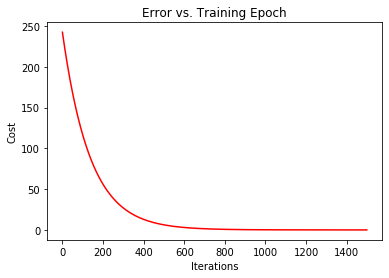

In [28]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iterationsl), custo_hl, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

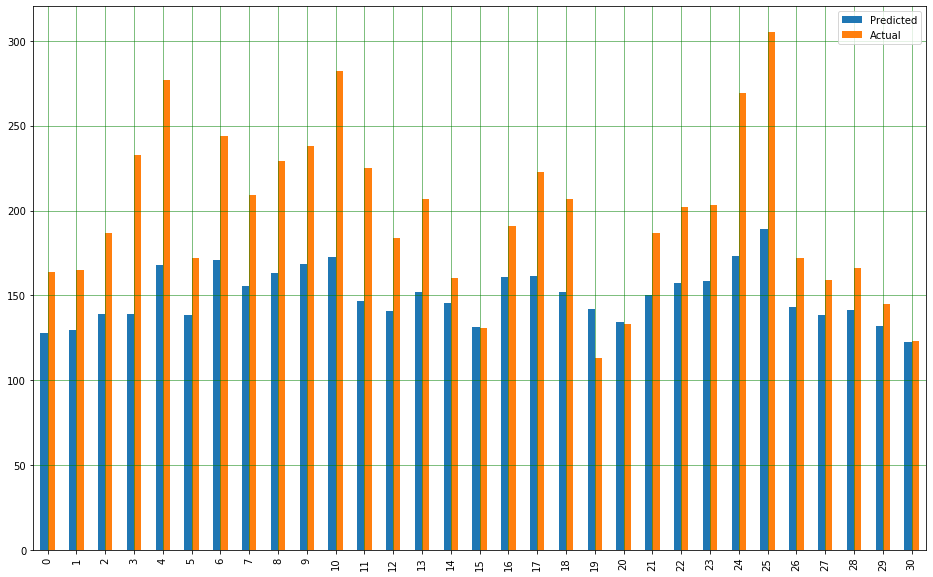

In [29]:
df = pd.DataFrame({'Predicted': Yfitl, 'Actual': yl})
# df1 = df.head(41)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

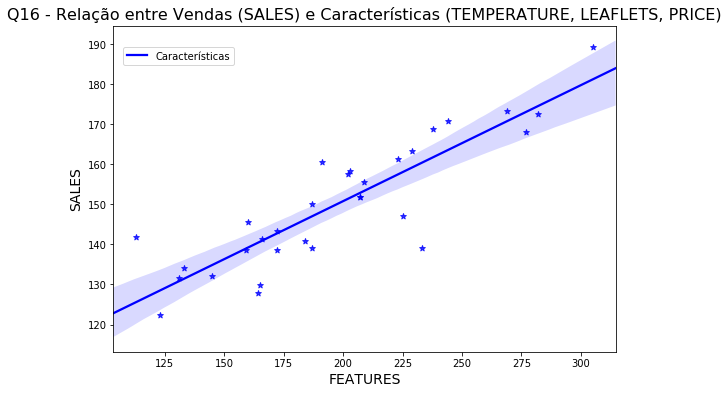

In [30]:
fig = plt.figure(figsize=(9,6))
sns.regplot(x=yl,y=Yfitl,color='blue', marker='*')

# Legend, title and labels.
plt.legend(labels=['Características'], bbox_to_anchor=(0.25, 0.95))
plt.title('Q16 - Relação entre Vendas (SALES) e Características (TEMPERATURE, LEAFLETS, PRICE)', size=16)
plt.xlabel('FEATURES', size=14)
plt.ylabel('SALES', size=14);
plt.show() 

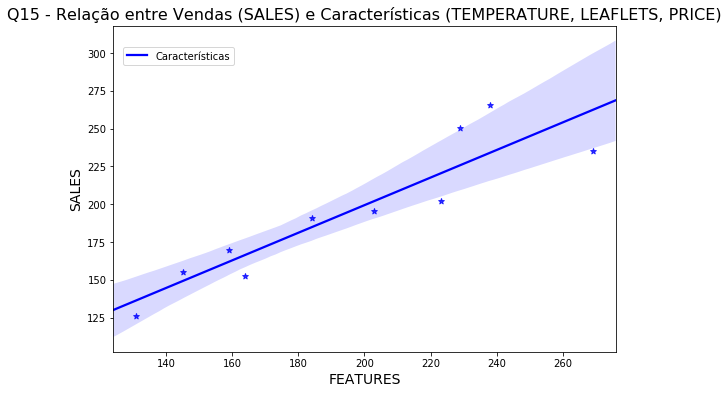

In [31]:
# Regression plot using seaborn.
fig = plt.figure(figsize=(9,6))
sns.regplot(x=y_test,y=y_pred8,color='blue', marker='*')

# Legend, title and labels.
plt.legend(labels=['Características'], bbox_to_anchor=(0.25, 0.95))
plt.title('Q15 - Relação entre Vendas (SALES) e Características (TEMPERATURE, LEAFLETS, PRICE)', size=16)
plt.xlabel('FEATURES', size=14)
plt.ylabel('SALES', size=14);
plt.show()

## 17) Aplique o algoritmo implementado na questão 16 no conjunto de dados consumo_cerveja.csv usando as mesmas features para treinamento.

In [32]:
beer = pd.read_csv('Consumo_cerveja.csv', sep = ';')
print('\033[1;31m Vamos entender nossos dados \033[0;0m','\n', beer.dtypes, '\n')
beer.head()

 Vamos entender nossos dados  
 Data                            object
Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                  int64
Consumo de cerveja (litros)    float64
dtype: object 



,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [33]:
#tratamento do data frame
beer = beer.rename(columns={'Temperatura Media (C)':'meanTemp','Temperatura Minima (C)':'minTemp','Temperatura Maxima (C)':'maxTemp',
                       'Precipitacao (mm)':'precip','Final de Semana':'weekend','Consumo de cerveja (litros)':'consumo'})
beer.head()

,Data,meanTemp,minTemp,maxTemp,precip,weekend,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [34]:
# Complete the call to convert the DATE column from string to datetime:
beer['Data'] =  pd.to_datetime(beer['Data'],format = '%d/%m/%Y')
print('\033[1;31m Confirmar que a coluna de data está no formato correto,\
 após conversão de string para datetime: \033[0;0m', '\n', beer['Data'].dtypes,'\n')

 Confirmar que a coluna de data está no formato correto, após conversão de string para datetime:  
 datetime64[ns] 



In [35]:
data2 = beer.iloc[0:,[3, 4, 5, 6]]
# data2 = StandardScaler().fit_transform(data2)
data2 = pd.DataFrame(data = data2,      # values
             columns=['maxTemp', 'precip', 'weekend', 'consumo']    # 1st row as the column names
                )

print('data2.head()', '\n', data2.head(), '\n')

xbeer = data2.iloc[0:,0:3]
ones_beer = np.ones(len(beer)) 
xbeer.insert(0,len(xbeer.columns) + 1, ones_beer)

ybeer = data2.iloc[:,-1]

thetabeer = np.zeros(len(xbeer.columns))

xbeer.columns = range(xbeer.shape[1])

xbeer = xbeer.to_numpy()
ybeer = ybeer.to_numpy()



data2.head() 
    maxTemp  precip  weekend  consumo
0     32.5     0.0        0   25.461
1     33.5     0.0        0   28.972
2     29.9     0.0        1   30.814
3     28.6     1.2        1   29.799
4     28.3     0.0        0   28.900 



##### Para igualar o modelo do SKL, separamos a base de dados entre treino e teste (70/30):

In [36]:
split_test_sizesklb = .3 # 30% da amostra é para teste
xbeer_train, xbeer_test, ybeer_train, ybeer_test = train_test_split(xbeer, ybeer, test_size=split_test_sizesklb, random_state=42)

#removendo primeira coluna de "ones" para uso no sklearn
xbeer_train_skl = DataFrame(xbeer_train)[[1,2,3]].values
xbeer_test_skl = DataFrame(xbeer_test)[[1,2,3]].values
print('xbeer_train', '\n',xbeer_train.shape, '\n')
print('xbeer_train_skl', '\n', xbeer_train_skl.shape, '\n')
print('ybeer_train', '\n', ybeer_train.shape, '\n')
print('xbeer_test', '\n', xbeer_test.shape, '\n')
print('xbeer_test_skl', '\n', xbeer_test_skl.shape, '\n')
print('ybeer_test', '\n', ybeer_test.shape, '\n')
print('thetabeer',' \n', thetabeer.shape, '\n')

iterations_beer = 1000
alpha_beer = 0.01

xbeer_train 
 (255, 4) 

xbeer_train_skl 
 (255, 3) 

ybeer_train 
 (255,) 

xbeer_test 
 (110, 4) 

xbeer_test_skl 
 (110, 3) 

ybeer_test 
 (110,) 

thetabeer  
 (4,) 



In [37]:
mlr = MultiLinearRegression() #algoritmo generalizado aula
custo_mlrb = mlr.cost_function(xbeer_train, ybeer_train, thetabeer)
custo_mlrb

1.0032635294117649

In [38]:
theta_lr_beer, custo_h_beer = mlr.gradient_descent(xbeer_train, ybeer_train, thetabeer, alpha_beer, iterations_beer)
theta_lr_beer

array([0.03419687, 0.87882502, 0.        , 0.        ])

In [39]:
#Custo atualizado
mlr = MultiLinearRegression()
custo_mlrb = mlr.cost_function(xbeer_train, ybeer_train, thetabeer)
custo_mlrb

1.489659333490877e-23

In [40]:
Yfit_beer = np.matmul(xbeer_train, theta_lr_beer) #acessando apenas os valores no df, np.matmul = Matrix product of two arrays.
Yfit_beer

array([21.91693998, 17.25916735, 23.05941251, 31.32036774, 20.42293744,
       22.26846999, 19.45622991, 32.11131027, 29.9142477 , 24.11400254,
       24.64129756, 19.98352493, 24.64129756, 22.35635249, 24.28976755,
       18.05010987, 26.75047762, 24.99282757, 19.1046999 , 21.65329247,
       22.44423499, 23.14729501, 19.0168174 , 21.82905748, 29.6506002 ,
       26.0474176 , 13.74386725, 30.61730772, 23.05941251, 25.34435758,
       20.51081994, 22.09270499, 21.56540997, 17.52281486, 24.28976755,
       16.29245982, 22.09270499, 22.795765  , 23.93823754, 24.72918006,
       22.00482248, 17.61069736, 23.14729501, 21.74117498, 21.38964497,
       25.08071007, 23.67459003, 25.87165259, 25.25647507, 24.11400254,
       23.14729501, 20.51081994, 24.11400254, 31.49613275, 23.93823754,
       26.66259511, 17.96222737, 23.85035503, 21.03811496, 25.95953509,
       24.11400254, 12.77715972, 19.71987742, 15.3257523 , 19.71987742,
       18.31375738, 23.93823754, 25.43224008, 28.68389267, 18.48

Text(0.5, 1.0, 'Error vs. Training Epoch')

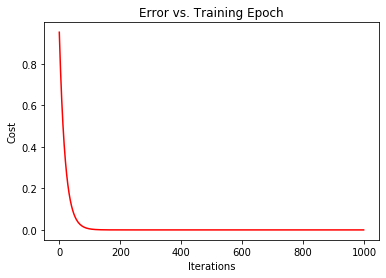

In [41]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iterations_beer), custo_h_beer, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

##### Percebemos que o valor do custo começa a ficar quase constante antes das 200 iterações. Portanto, não haveria necessidade de usar 1000 iterações pois não há melhora significativa de J.

### a. Compare os resultados que você obteve com os resultados obtidos através da Scikit Learning.

In [42]:
lr_modelsklb = linear_model.LinearRegression()
lr_modelsklb.fit(xbeer_train_skl, ybeer_train.ravel()) # flatten arrays --> Transformando de matriz para vetor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
Yfit_beer_p = lr_modelsklb.predict(xbeer_train_skl)
Yfit_beer_p

array([26.83508301, 19.47966407, 29.22030086, 30.12822964, 21.78725112,
       27.83958781, 21.09541937, 30.56452487, 29.09202396, 24.68635901,
       30.40592869, 21.54899155, 30.42184585, 22.3750569 , 24.69252677,
       20.08043656, 26.68893399, 25.34857828, 20.88146656, 22.81728903,
       23.41806152, 29.12788182, 20.68737682, 22.95079403, 28.89176646,
       26.15491399, 20.68015776, 34.78062138, 23.88532902, 25.620894  ,
       20.93080867, 23.15105153, 22.75053653, 19.59503008, 24.81986401,
       23.95302119, 23.15105153, 29.02004336, 24.55285401, 24.64958329,
       23.08429903, 19.36996809, 29.28705336, 22.88404153, 22.59580866,
       23.91381257, 23.83794186, 30.66663749, 30.00305843, 24.68635901,
       29.28705336, 17.86410363, 30.02133085, 30.29356894, 24.55285401,
       26.62218149, 20.01368407, 24.48610151, 27.65315907, 31.42313334,
       24.32557018, 21.17680686, 21.01447381, 17.95805191, 21.34873405,
       25.6156659 , 22.45178966, 25.6876465 , 28.15748897, 25.74

In [44]:
#thetas do SciKit Learning
print("Intercept: ", lr_modelsklb.intercept_)
print("Theta: ", lr_modelsklb.coef_)


Intercept:  6.3961742286972445
Theta:  [ 0.66752499 -0.05305718  5.33497184]


In [45]:
theta_lr_beer #theta do modelo Q16

array([0.03419687, 0.87882502, 0.        , 0.        ])

In [46]:
#fazendo o "predict" na mão
Yfit_beer_skl = np.matmul(xbeer_train_skl, lr_modelsklb.coef_) + lr_modelsklb.intercept_
Yfit_beer_skl

array([26.83508301, 19.47966407, 29.22030086, 30.12822964, 21.78725112,
       27.83958781, 21.09541937, 30.56452487, 29.09202396, 24.68635901,
       30.40592869, 21.54899155, 30.42184585, 22.3750569 , 24.69252677,
       20.08043656, 26.68893399, 25.34857828, 20.88146656, 22.81728903,
       23.41806152, 29.12788182, 20.68737682, 22.95079403, 28.89176646,
       26.15491399, 20.68015776, 34.78062138, 23.88532902, 25.620894  ,
       20.93080867, 23.15105153, 22.75053653, 19.59503008, 24.81986401,
       23.95302119, 23.15105153, 29.02004336, 24.55285401, 24.64958329,
       23.08429903, 19.36996809, 29.28705336, 22.88404153, 22.59580866,
       23.91381257, 23.83794186, 30.66663749, 30.00305843, 24.68635901,
       29.28705336, 17.86410363, 30.02133085, 30.29356894, 24.55285401,
       26.62218149, 20.01368407, 24.48610151, 27.65315907, 31.42313334,
       24.32557018, 21.17680686, 21.01447381, 17.95805191, 21.34873405,
       25.6156659 , 22.45178966, 25.6876465 , 28.15748897, 25.74

##### Vamos comparar o modelo SKL e a Regressão Linear Multivariada (RLM) obtida na q16 usando a massa de treino:

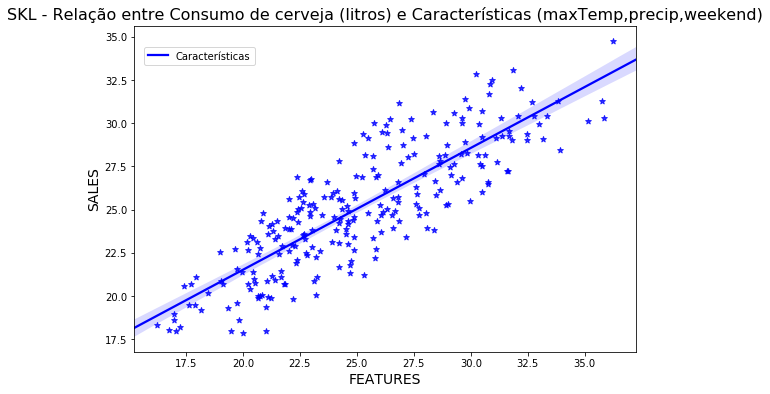

In [47]:
fig = plt.figure(figsize=(9,6))
sns.regplot(x=ybeer_train,y=Yfit_beer_skl,color='blue', marker='*')

# Legend, title and labels.
plt.legend(labels=['Características'], bbox_to_anchor=(0.25, 0.95))
plt.title('SKL - Relação entre Consumo de cerveja (litros) e Características (maxTemp,precip,weekend)', size=16)
plt.xlabel('FEATURES', size=14)
plt.ylabel('SALES', size=14);
plt.show()

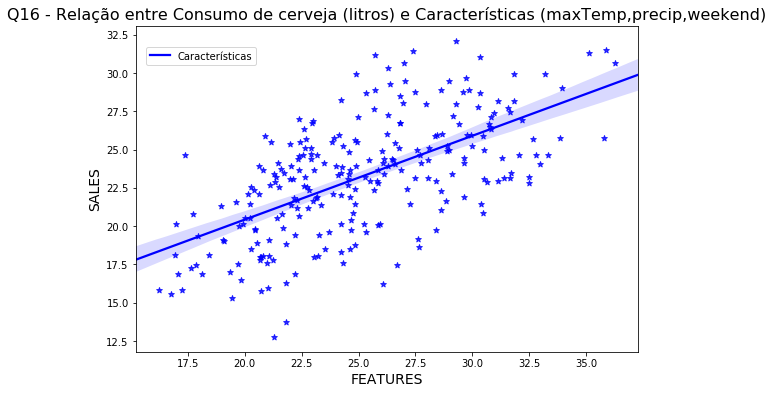

In [48]:
fig = plt.figure(figsize=(9,6))
sns.regplot(x=ybeer_train,y=Yfit_beer,color='blue', marker='*')

# Legend, title and labels.
plt.legend(labels=['Características'], bbox_to_anchor=(0.25, 0.95))
plt.title('Q16 - Relação entre Consumo de cerveja (litros) e Características (maxTemp,precip,weekend)', size=16)
plt.xlabel('FEATURES', size=14)
plt.ylabel('SALES', size=14);
plt.show() 

### b. Prediga o consumo usando seu modelo e o modelo da sklearn.


In [49]:
# Hipotese so SKL:
pred_value_skl = lr_modelsklb.predict(xbeer_test_skl)
pred_value_skl

array([25.5541415 , 27.07130999, 28.11812711, 21.61574405, 27.32462467,
       17.73421627, 22.48352654, 18.87889158, 18.051333  , 20.88146656,
       32.15210511, 26.88919148, 25.24055058, 25.84854213, 20.61445656,
       22.35002154, 28.09073647, 27.09284136, 24.68635901, 28.88653837,
       34.5605008 , 22.01625904, 29.70779574, 19.26100071, 25.01489341,
       24.81986401, 29.22030086, 29.95980645, 22.87120826, 24.21909152,
       24.45055214, 29.88782585, 28.22424147, 32.55570399, 23.61831902,
       27.28447838, 27.48996398, 23.62757067, 25.02012151, 31.62339083,
       27.89047897, 32.29091582, 27.94139194, 24.54762592, 24.81614895,
       31.75689583, 24.75311151, 24.79701447, 26.10838888, 29.23164091,
       29.22030086, 31.77712322, 31.75689583, 33.9597283 , 20.34744656,
       25.8211515 , 31.35638084, 30.75869223, 26.59357011, 24.31631853,
       22.38493973, 27.98462211, 24.82775587, 23.41520851, 29.09202396,
       29.6048987 , 25.1536265 , 19.75542797, 20.14718906, 23.95

In [50]:
# Hipotese da RLM estimada na Q16:
pred_value = np.matmul(xbeer_test, theta_lr_beer)
pred_value

array([25.25647507, 27.36565513, 28.77177517, 20.07140743, 27.62930264,
       16.20457732, 21.21387996, 16.46822483, 15.4136348 , 19.1046999 ,
       26.92624262, 27.01412512, 19.71987742, 25.78377009, 18.75316989,
       21.03811496, 28.59601017, 22.00482248, 24.11400254, 22.62      ,
       30.09001271, 20.59870244, 24.55341505, 19.1925824 , 17.52281486,
       24.28976755, 23.05941251, 31.05672024, 21.82905748, 23.49882502,
       25.25647507, 23.93823754, 28.77177517, 27.54142014, 22.7078825 ,
       20.51081994, 27.80506765, 22.97153001, 24.55341505, 26.2231826 ,
       28.33236266, 27.10200763, 21.38964497, 16.90763734, 25.69588759,
       26.39894761, 24.20188504, 26.66259511, 26.83836012, 24.28976755,
       23.05941251, 27.27777263, 26.39894761, 29.29907019, 18.40163988,
       25.60800508, 25.87165259, 25.16859257, 26.2231826 , 23.85035503,
       21.12599746, 28.59601017, 24.81706256, 24.02612004, 29.9142477 ,
       23.58670753, 24.72918006, 18.31375738, 18.13799237, 23.14

In [51]:
#testando com novas amostras
pred_value_skl_ind = [[35,0,1]] # 35 graus de temperatura, não choveu, final de semana.
lr_modelsklb.predict(pred_value_skl_ind)

array([35.09452079])

In [52]:
pred_value_beer_ind = [[1,35,0,1]]
np.matmul(pred_value_beer_ind, theta_lr_beer)

array([30.79307273])

### c. Calcule o MSE de ambos

In [53]:
mean_squared_error(ybeer_test, pred_value_skl) # MSE do SciKit Learning

5.4808534596126615

In [54]:
mean_squared_error(ybeer_test, pred_value) # MSE do Algoritmo Generalizado Aula

16.02562461594156

##### Obs: Percebemos uma diferença entre o custo da RLM q16 vs SKL, talvez devido o SKL não usa o Gradiente Descendente.